In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
pd.set_option("display.max_columns", 100)

In [7]:
raw_df = pd.read_csv("survey_results_public.csv", index_col="ResponseId")
schema_df = pd.read_csv("survey_results_schema.csv")

In [8]:
def plot_bar_graph(xy=None,x=None, y=None, hor=False, xlabel="", ylabel="",w=0.9, xl=None, yl=None, title="",indent=None, d={}):
    if not (x and y):
        x = list(xy.index)
        y = list(xy.values)
    x.reverse()
    y.reverse()
    for i in range(len(x)):
        x[i]=d.get(x[i], x[i])
    if(xl and yl): plt.figure(figsize=(xl, yl))
    c = np.random.rand(len(x), 3)
    if hor:
        plt.barh(x, y, color=c)
    else:
        plt.bar(x, y, color=c)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v)+" ", va="center", ha="right" if(indent and v>indent) else "left")

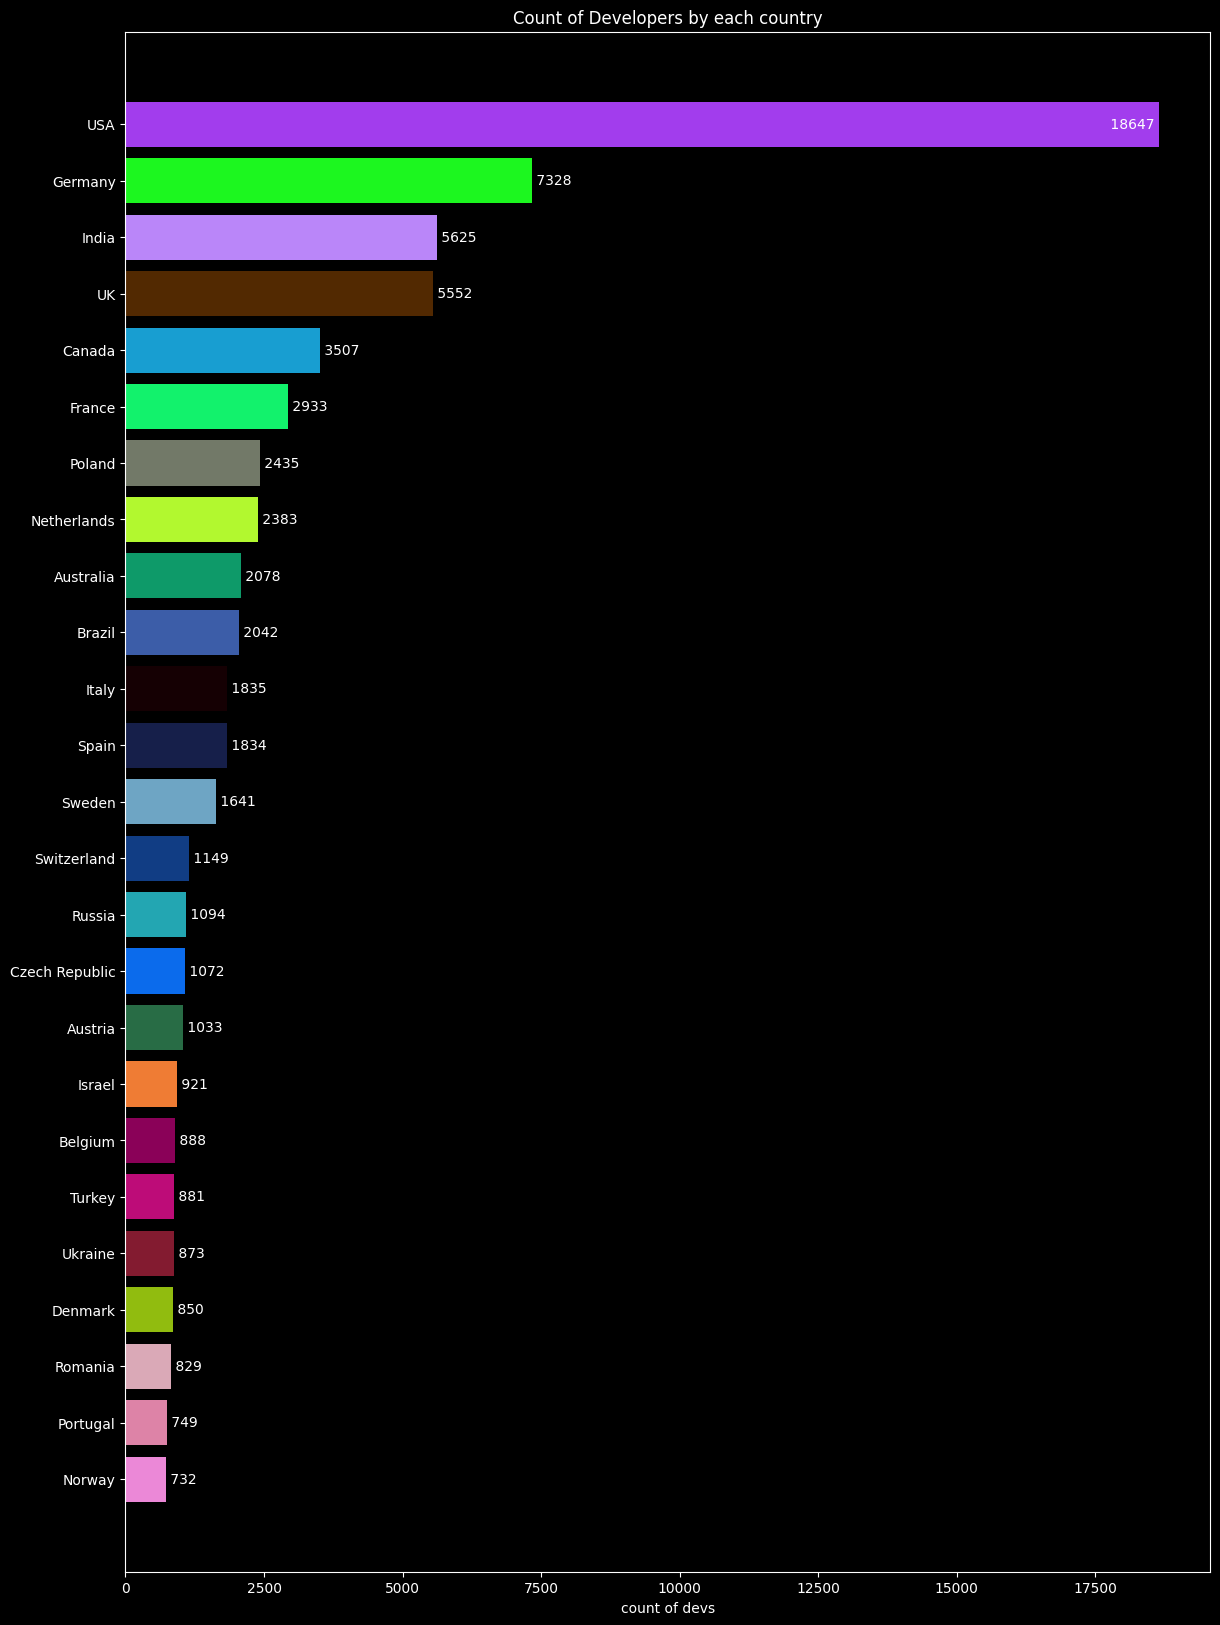

In [37]:
top_countries = raw_df["Country"].value_counts().head(25)
a=plot_bar_graph(
    top_countries, 
    hor=True, 
    title="Count of Developers by each country",
    xl=14, yl=20,
    indent=10000,
    xlabel="count of devs",
    d={'United States of America':"USA", 'United Kingdom of Great Britain and Northern Ireland': "UK", 'Russian Federation':"Russia"}
)

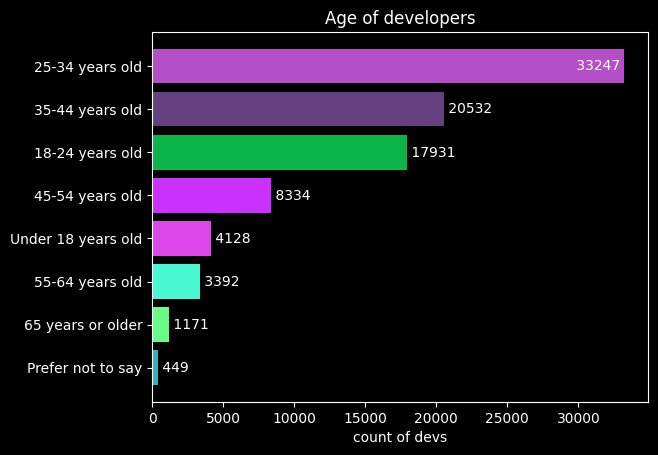

In [39]:
Age_Ranges = raw_df["Age"].value_counts()
plot_bar_graph(
    xy=Age_Ranges,
    hor=True,
    indent=30000,
    xlabel="count of devs",
    title="Age of developers"
)

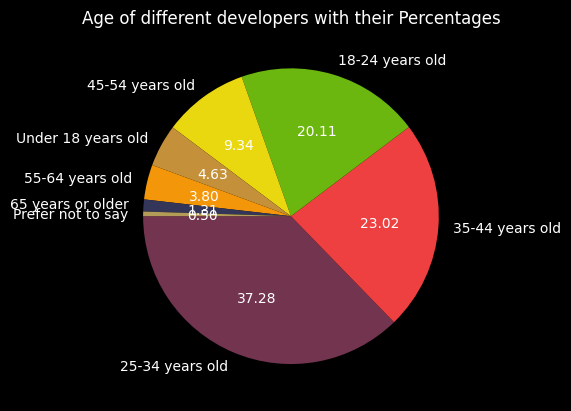

In [11]:
plt.title("Age of different developers with their Percentages")
plt.pie(Age_Ranges, labels=Age_Ranges.index, startangle=180, autopct='%0.2f', colors=np.random.rand(len(Age_Ranges), 3))
plt.show()

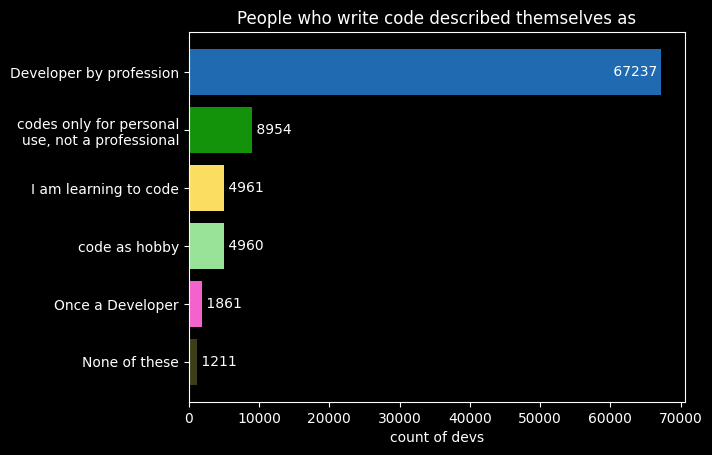

In [40]:
mb = raw_df["MainBranch"].value_counts()
plot_bar_graph(
    xy=mb,
    hor=True,
    indent=60000,
    title="People who write code described themselves as",
    xlabel="count of devs",
    d={"I am a developer by profession":"Developer by profession","I am not primarily a developer, but I write code sometimes as part of my work/studies":"codes only for personal\nuse, not a professional","I used to be a developer by profession, but no longer am":"Once a Developer","I code primarily as a hobby":"code as hobby" }
)

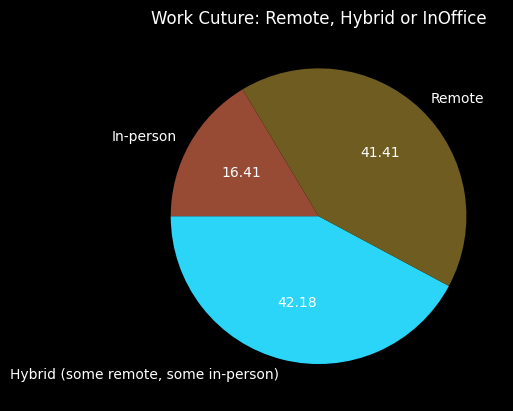

In [13]:
rw = raw_df["RemoteWork"].value_counts()
plt.title("Work Cuture: Remote, Hybrid or InOffice")
plt.pie(rw, labels=rw.index, startangle=180, autopct="%2.2f", colors=np.random.rand(len(rw), 3))
plt.show()

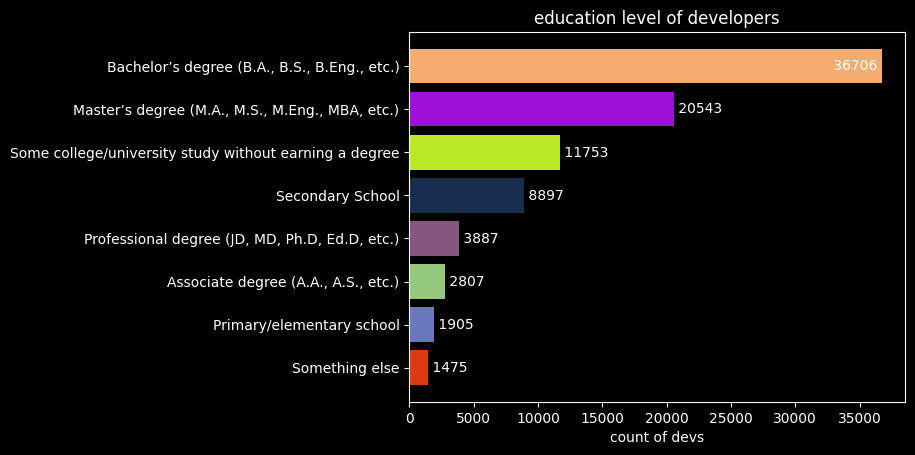

In [41]:
ed = raw_df["EdLevel"].value_counts()
plot_bar_graph(
    xy=ed,
    hor=True,
    title="education level of developers",
    xlabel="count of devs",
    indent=30000,
    d={"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary School"}
)

In [42]:
dt = raw_df["DevType"].value_counts()
plot_bar_graph(
    xy=dt,
    hor=True,
    title="Profession of Developers",
    xlabel="count of developers",
    xl=12, yl=24,
    indent=10000
)

In [43]:
CA = dict(raw_df["CodingActivities"].value_counts())
l, d=raw_df["CodingActivities"].shape[0], {}
for i, v in list(CA.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
for i in list(d.keys()):
    d[i]=round(d[i]*100/l, 2)
del d["Other (please specify):"]
plt.title("Developers describing code they write outside their work")
plt.pie(d.values(), labels=d.keys(), startangle=180, autopct="%0.2f")
plt.show()

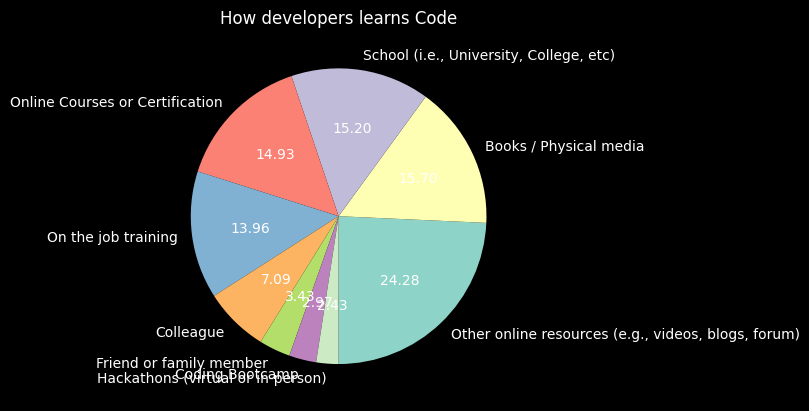

In [45]:
CA = dict(raw_df["LearnCode"].value_counts())
l, d=raw_df["LearnCode"].shape[0], {}
for i, v in list(CA.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
for i in list(d.keys()):
    d[i]=round(d[i]*100/l, 2)
del d["Other (please specify):"]
plt.title("How developers learns Code")
plt.pie(d.values(), labels=d.keys(), startangle=270, autopct="%0.2f")
plt.show()

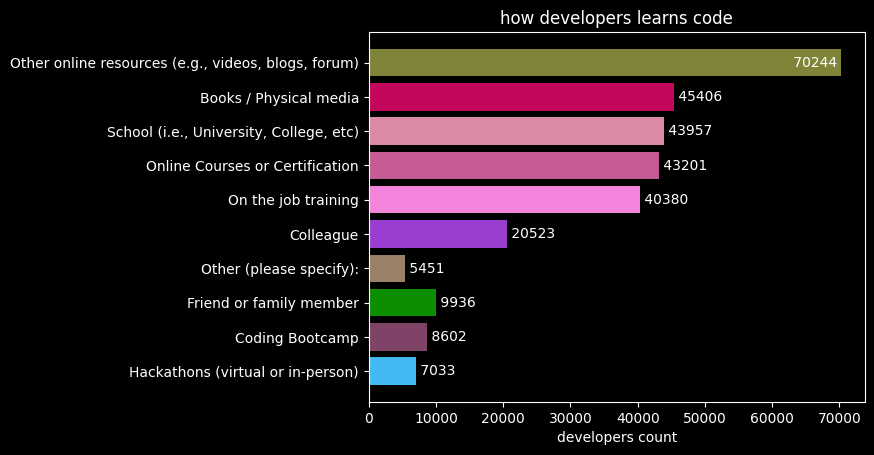

In [46]:
CA = dict(raw_df["LearnCode"].value_counts())
l, d=raw_df["LearnCode"].shape[0], {}
for i, v in list(CA.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,
    indent=70000,
    title="how developers learns code",
    xlabel="developers count"
)

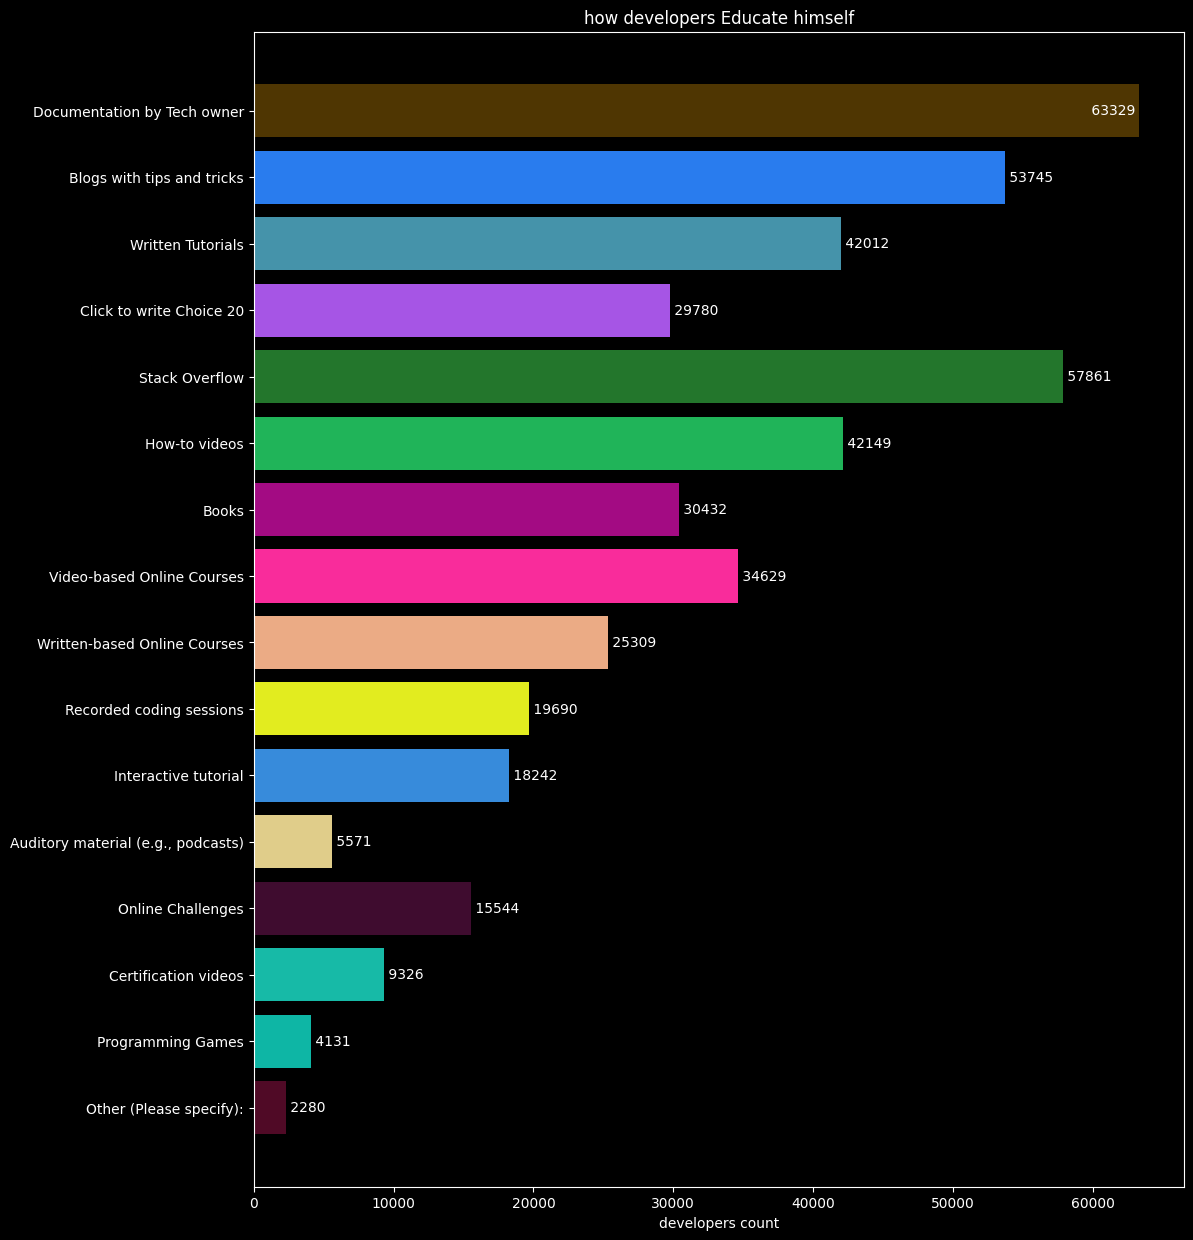

In [19]:
LCO = dict(raw_df["LearnCodeOnline"].value_counts())
l, d=raw_df["LearnCodeOnline"].shape[0], {}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=15,
    indent=60000,
    title="how developers Educate himself",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


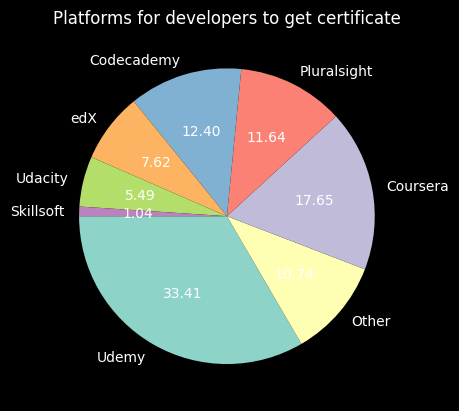

In [20]:
CA = dict(raw_df["LearnCodeCoursesCert"].value_counts())
l, d=raw_df["LearnCode"].shape[0], {}
for i, v in list(CA.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
for i in list(d.keys()):
    d[i]=round(d[i]*100/l, 2)
# del d["Other (please specify):"]
plt.title("Platforms for developers to get certificate")
plt.pie(d.values(), labels=d.keys(), startangle=180, autopct="%0.2f")
plt.show()

In [32]:
import plotly.express as px
nraw = raw_df
def app(x):
    if(x=="More than 50 years") :
        return 51
    if(x=="Less than 1 year") :
        return 0
    if(pd.isna(x)):
        return x
    return float(x)
nraw["YearsCode"] = nraw["YearsCode"].apply(app)
rad_sort = nraw.sort_values(by="YearsCode", ignore_index=True)
YC = rad_sort["YearsCode"]
rad_sort["YearsCode"] = rad_sort["YearsCode"].apply(lambda x: x if (1<=x<=50) else ("More Than 50 years" if x==51 else "Less than 1 year"))
fig = px.histogram(rad_sort, x=YC, marginal="box",title="Years of Coding Experience vs age")
fig.show()


In [33]:
import plotly.express as px
raw_df1 = raw_df
# Convert "YearsCode" column to numeric (ignoring errors)
raw_df1["YearsCode"] = pd.to_numeric(raw_df1["YearsCode"], errors="coerce")

# Sort DataFrame based on the numeric "YearsCode" column
raw_df_sorted = raw_df1.sort_values(by="YearsCode", ignore_index=True)

fig = px.histogram(raw_df_sorted, x="YearsCode", marginal="box", title="PROFSSIONAL CODING EXPERIENCE vs AGE")
fig.show()


In [23]:
LCO = dict(raw_df["LanguageHaveWorkedWith"].value_counts())
l=raw_df["LanguageHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=30,
    indent=50000,
    title="Programming languages used by devs",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


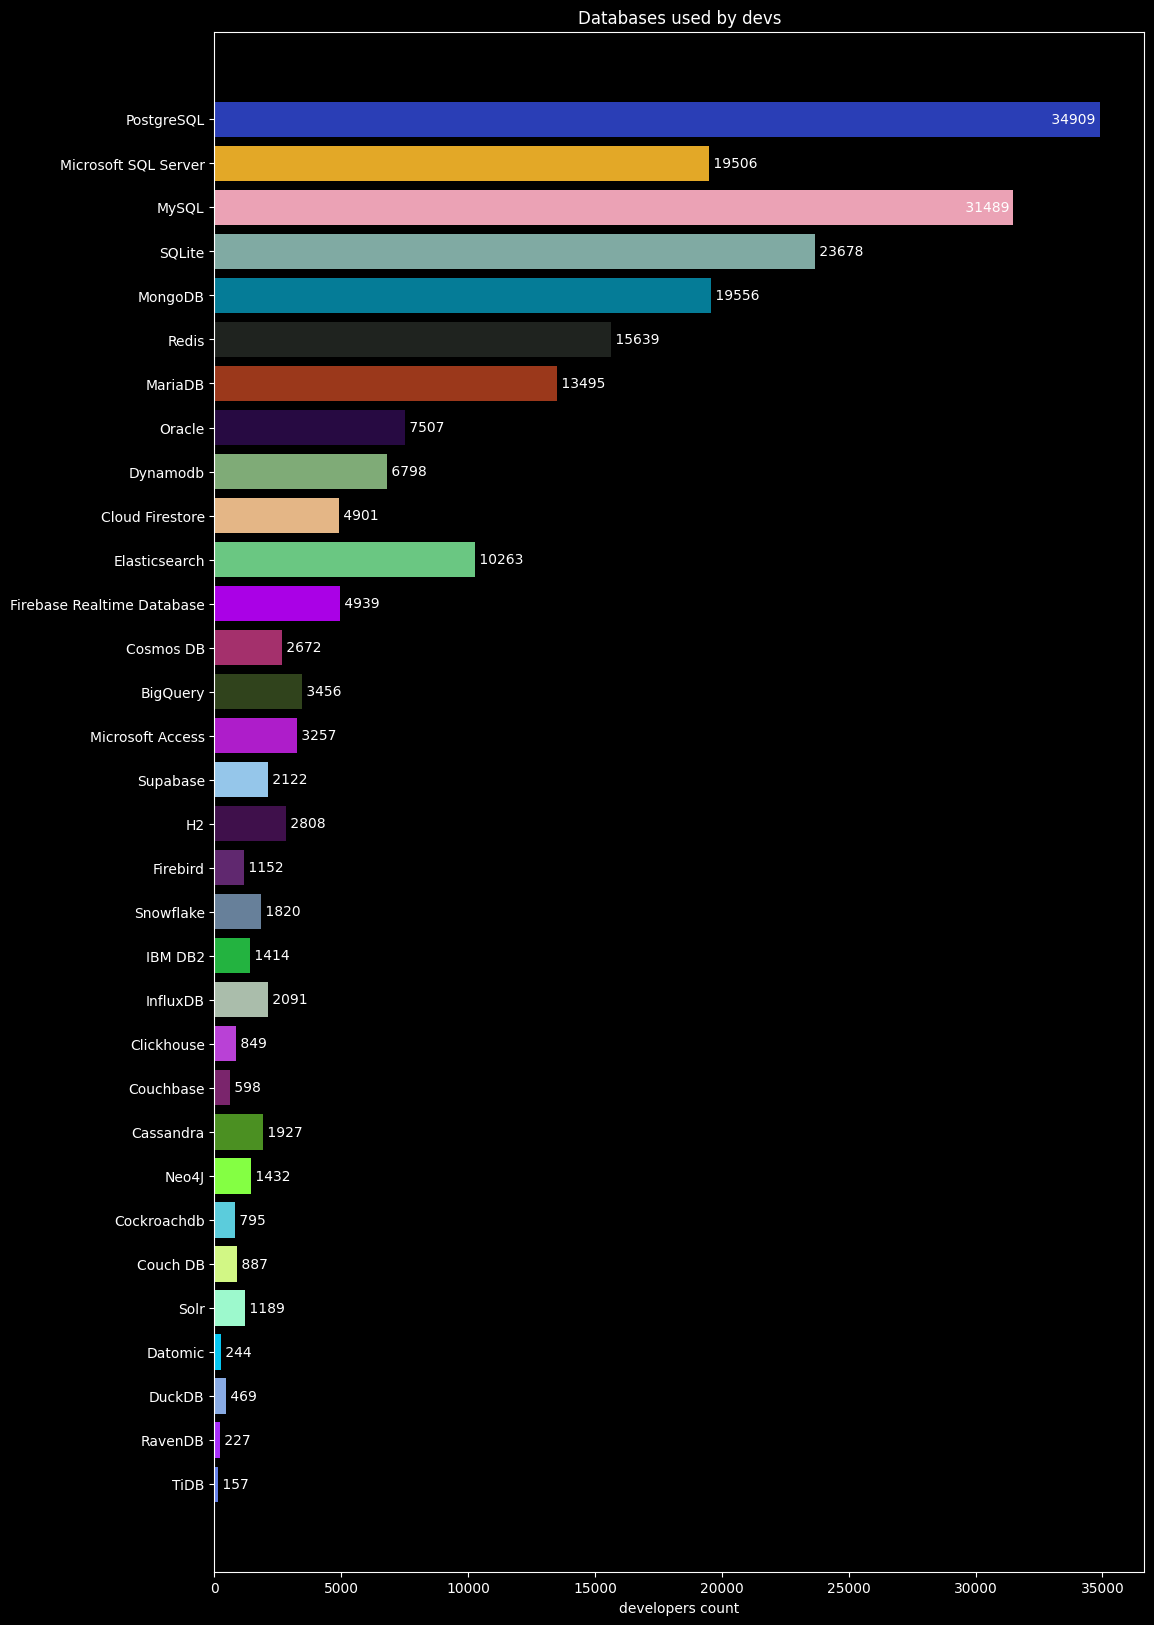

In [24]:
LCO = dict(raw_df["DatabaseHaveWorkedWith"].value_counts())
l=raw_df["DatabaseHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=20,
    indent=30000,
    title="Databases used by devs",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


In [25]:
LCO = dict(raw_df["PlatformHaveWorkedWith"].value_counts())
l=raw_df["PlatformHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=20,
    indent=30000,
    title="Cloud Platforms used by developers",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


In [26]:
LCO = dict(raw_df["WebframeHaveWorkedWith"].value_counts())
l=raw_df["WebframeHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=20,
    indent=30000,
    title="Web Frameworks used by developers",
    xlabel="developers count",
    
)
# d


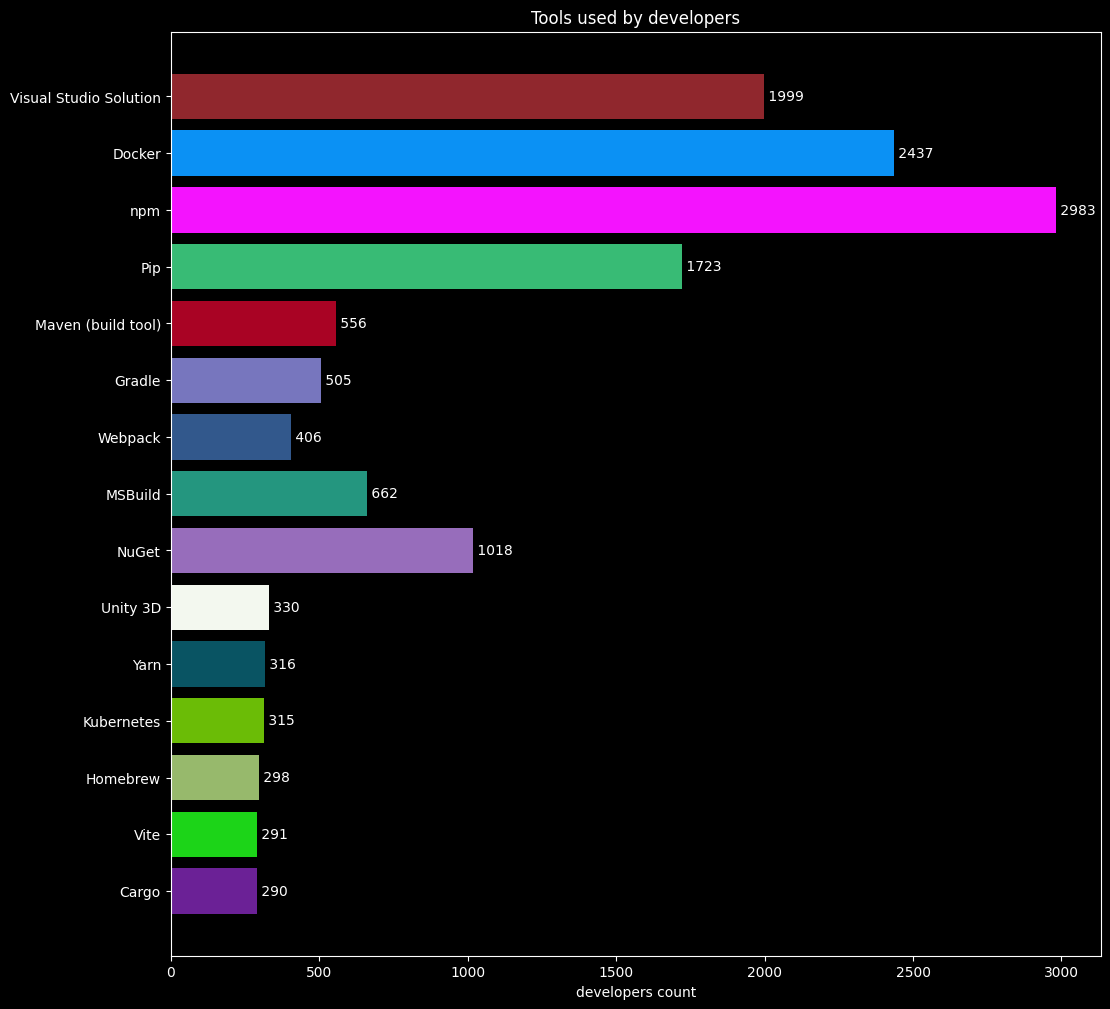

In [27]:
LCO = dict(raw_df["ToolsTechHaveWorkedWith"].value_counts().head(20))
l=raw_df["ToolsTechHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=12,
    indent=30000,
    title="Tools used by developers",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


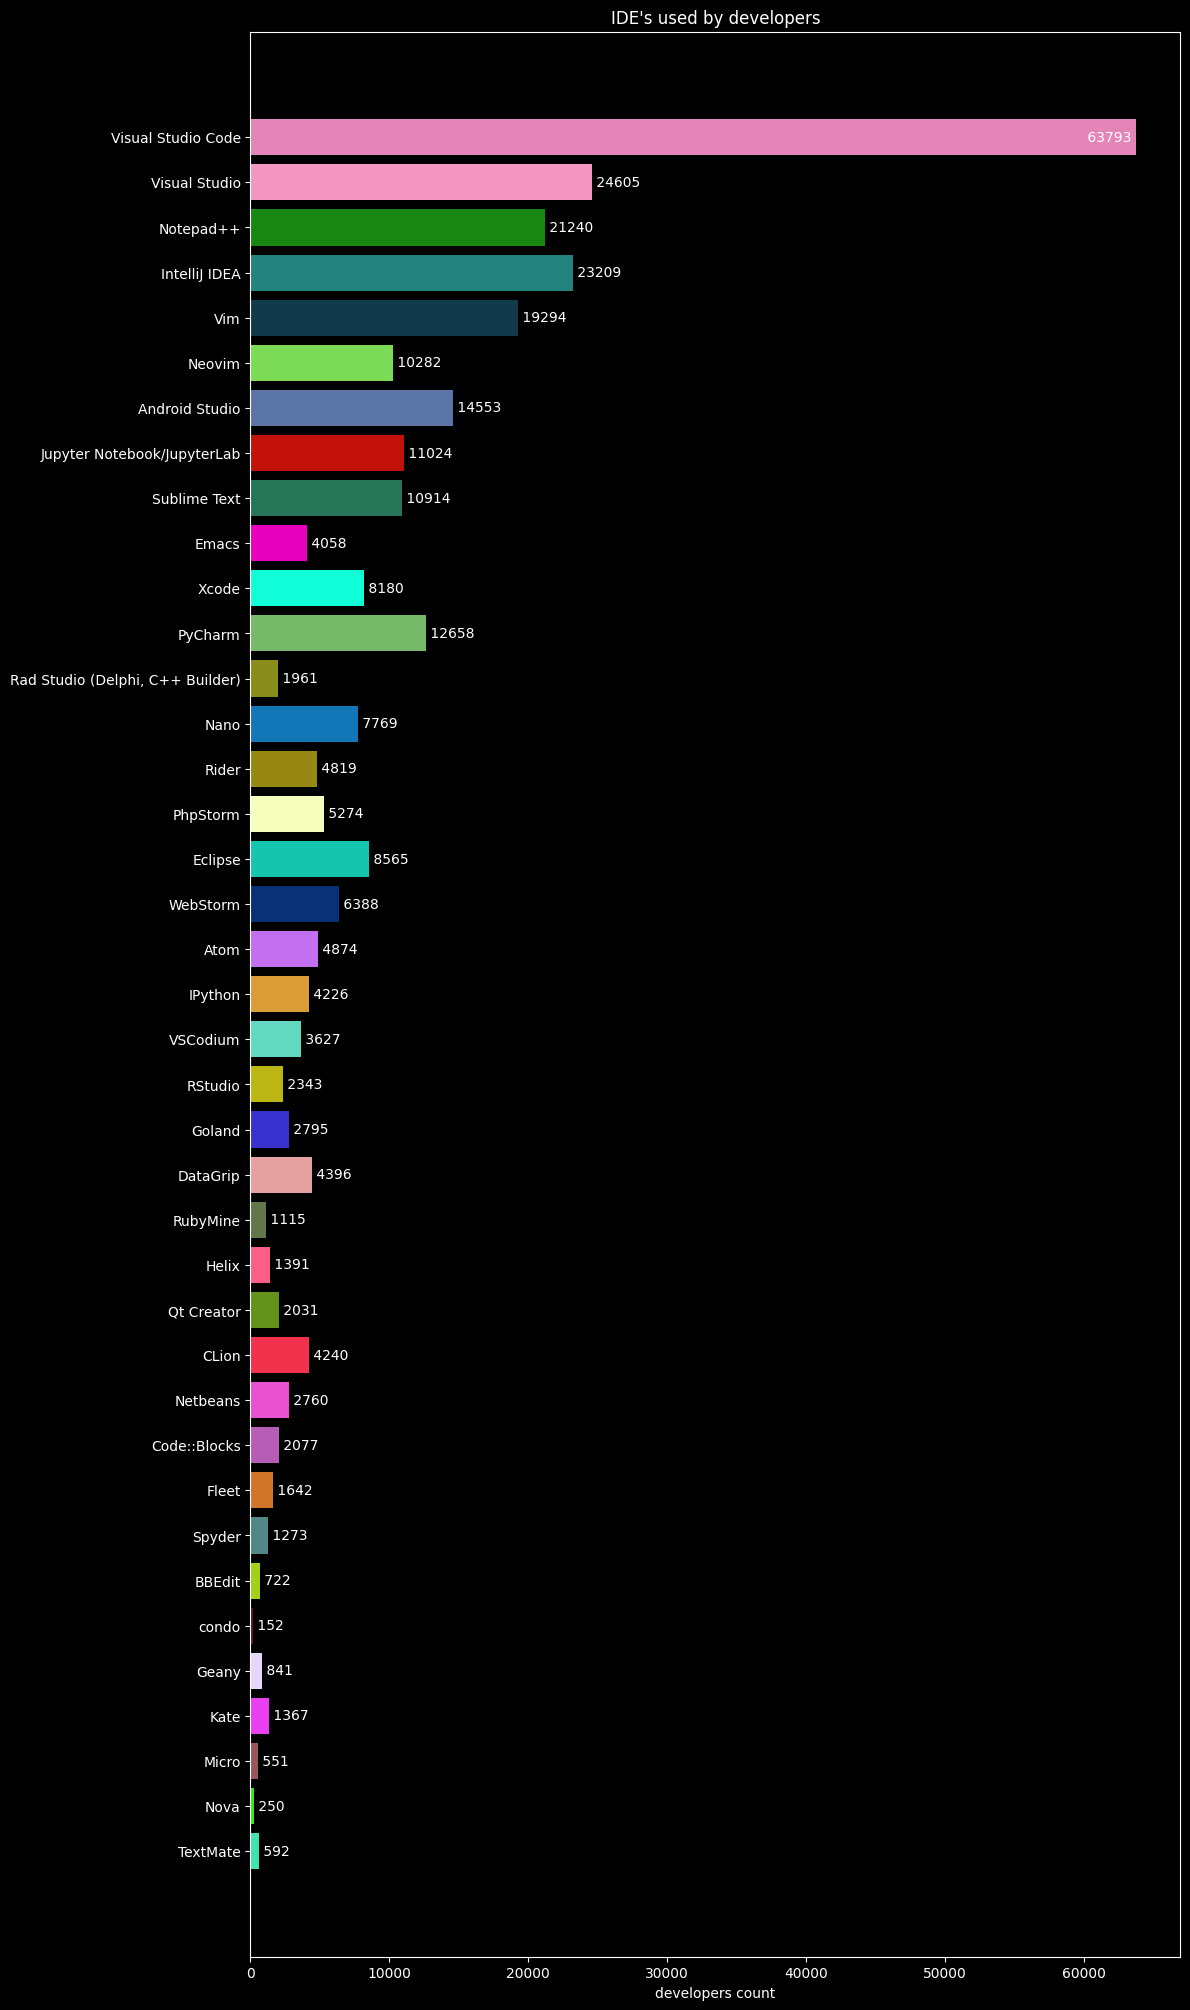

In [28]:
LCO = dict(raw_df["NEWCollabToolsHaveWorkedWith"].value_counts())
l=raw_df["NEWCollabToolsHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=25,
    indent=30000,
    title="IDE's used by developers",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


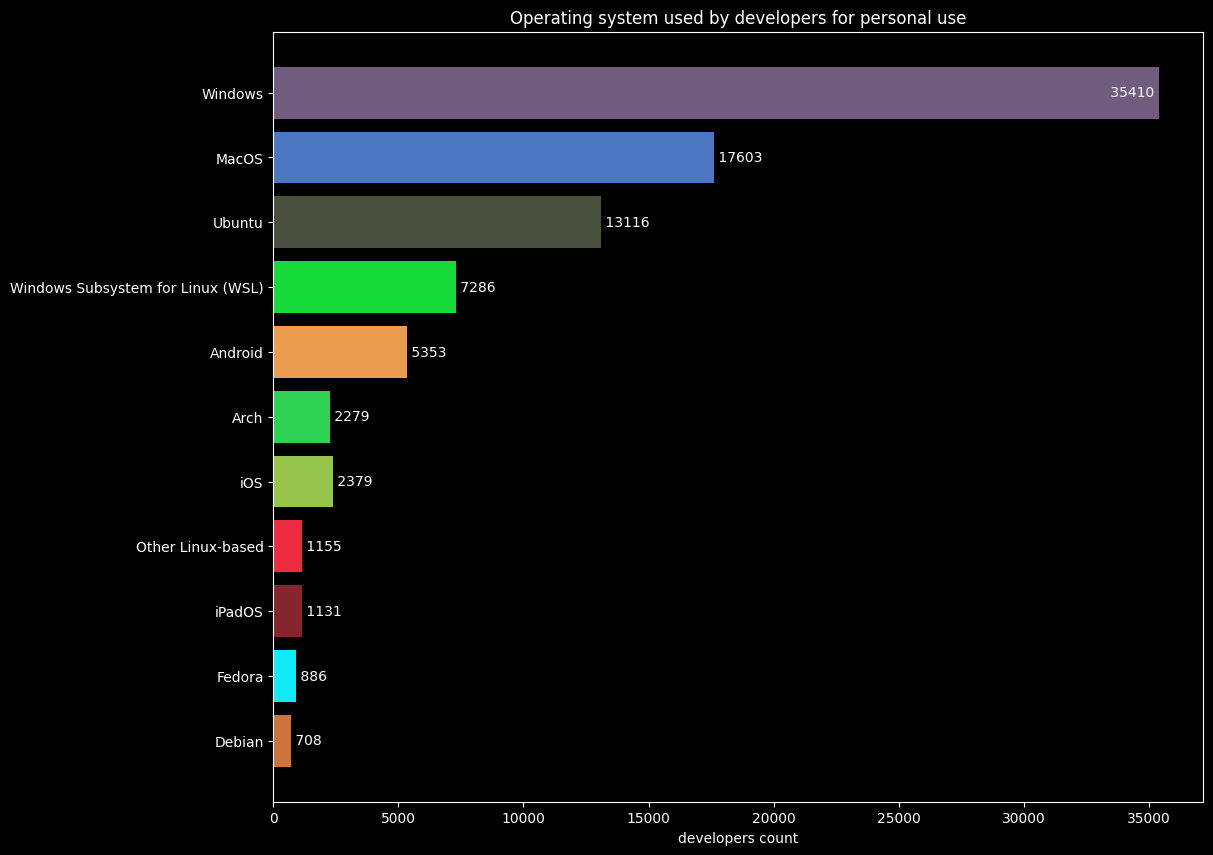

In [29]:
LCO = dict(raw_df["OpSysPersonal use"].value_counts().head(20))
l=raw_df["OpSysPersonal use"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=10,
    indent=30000,
    title="Operating system used by developers for personal use",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


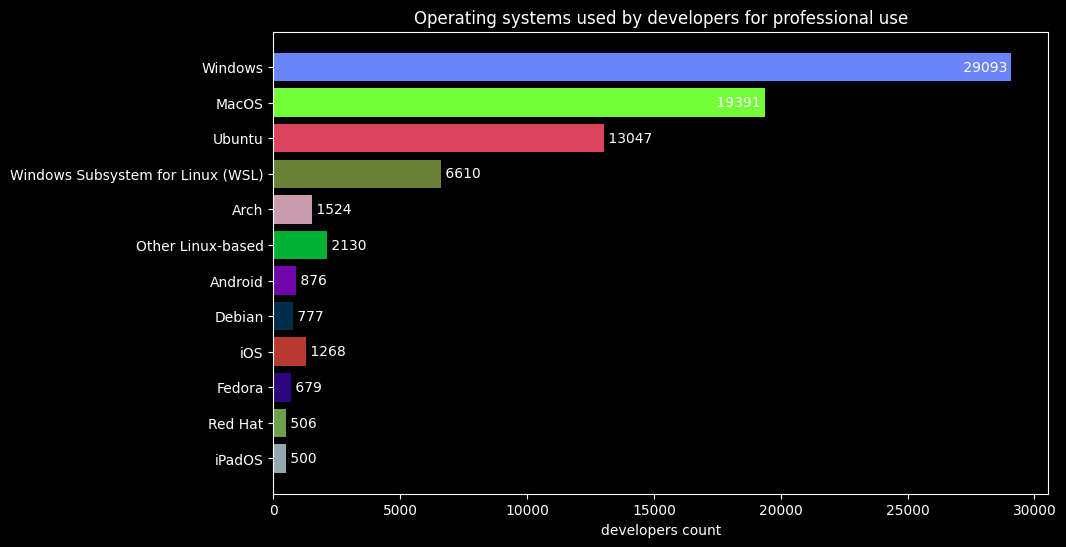

In [30]:
LCO = dict(raw_df["OpSysProfessional use"].value_counts().head(20))
l=raw_df["OpSysProfessional use"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=10, yl=6,
    indent=15000,
    title="Operating systems used by developers for professional use",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d


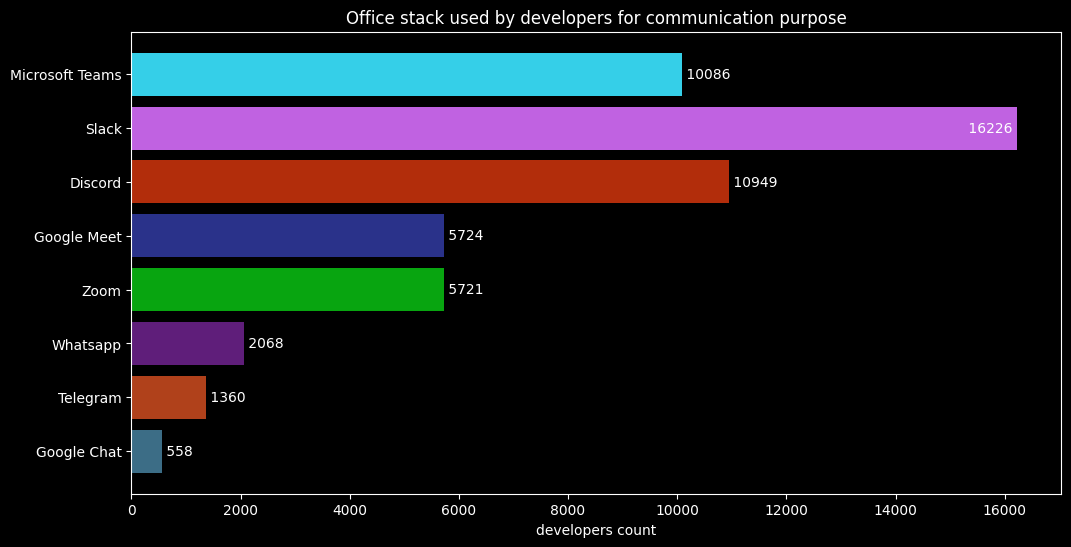

In [31]:
LCO = dict(raw_df["OfficeStackSyncWantToWorkWith"].value_counts().head(20))
l=raw_df["OfficeStackSyncWantToWorkWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
# del d["Other (Please specify):"]
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=6,
    indent=16000,
    title="Office stack used by developers for communication purpose",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)
# d
